<table style="width: 100%; border: none;">
    <tr>
        <!-- Columna para la imagen -->
        <td style="width: 100px; vertical-align: top; padding-right: 20px;">
            <img src="figs/uah1.png" style="width: 80px; height: auto; border-radius: 50%; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
        </td>
        <!-- Columna para los textos -->
        <td style="vertical-align: top;">
            <h1 style="font-size: 32px; color: #003366; margin: 0;">Geospatial Data Science</h1>
            <h2 style="font-size: 24px; color: #005599; margin-top: 10px; margin-bottom: 10px;">Tema 1: Objetos geométricos</h2>
            <h3 style="font-size: 18px; color: #666; margin-bottom: 10px; font-weight: normal;">
                Advanced Programming · Máster en Tecnologías de la Información Geográfica
            </h3>
            <h4 style="font-size: 16px; color: #444;">Profesora: <span style="font-weight: bold; color: #222;">Julia Clemente</span></h4>
        </td>
    </tr>
</table>


# Imports

In [2]:
import geopandas as gpd # para manejo de datos. Más adelante se profundizará en este paquete
import contextily as ctx # para mostrar gráficos. En la siguiente sesión se tratará

# Caso de estudio: Brote de cólera de 1854

Primero realizaremos una exploración de los datos:

In [3]:
!ls data/SnowGIS/

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Tipos de formatos:
- [shapefiles](https://en.wikipedia.org/wiki/Shapefile) - normalmente son grupos de archivos que contienen datos vectoriales geoespaciales, con el mismo nombre, pero extensiones como .shp, .shx, .dbf. Nos vamos a centrar en el archivo .shp que contiene las características geométricas.

<img src="figs/shapeinfografia.jpg" width="400">

Fuente: https://www.facebook.com/memesgis/posts/conoce-sobre-los-shapefile-/1151359318575570/

- Imágenes raster in [tif format](https://en.wikipedia.org/wiki/TIFF)

<img src="figs/modelsrastervector.jpg">

Fuente: https://www.researchgate.net/publication/316879160_Three-dimensional_anatomical_atlas_of_the_human_body/figures?lo=1

## Cargar los datos y garantizar la coherencia del sistema de referencia de coordenadas (CRS)

Cargar los datos - muertes y bombas de agua:

In [4]:
deaths_df = gpd.read_file('data/SnowGIS/Cholera_Deaths.shp')
pumps_df = gpd.read_file('data/SnowGIS/Pumps.shp')

In [5]:
deaths_df.head()

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.38 181014.259)
4,0,4,POINT (529320.675 181007.872)


In [5]:
type(deaths_df)

geopandas.geodataframe.GeoDataFrame

Podemos ver cuántas muertes han ocurrido y dónde. Son puntos, con una coordenada x y una y. ¿Qué son? El CRS del archivo shape nos lo dice:

In [6]:
deaths_df.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<table><tr><td><img src="figs/osgb36_01.png" width=300><td><img src="figs/osgb36_02.png" width=300>

El *Coordinate Reference System* (CRS) maneja las coordenadas: ¿Cómo se proyectan las coordenadas de una esfera en el plano?

Las coordenadas de la esfera son longitud y latitud. Sin embargo, nuestros mapas son planos, no esferas, de ahí que debemos proyectar. Para realizar GDS, uno debe estar familiarizado con los siguientes términos:  

https://en.wikipedia.org/wiki/Longitude  
https://en.wikipedia.org/wiki/Latitude  
https://en.wikipedia.org/wiki/Prime_meridian  
https://en.wikipedia.org/wiki/Map_projection  
https://en.wikipedia.org/wiki/Earth_radius  
https://en.wikipedia.org/wiki/Geoid  
https://en.wikipedia.org/wiki/Spatial_reference_system  
https://en.wikipedia.org/wiki/World_Geodetic_System  
https://en.wikipedia.org/wiki/Grid_reference_system  
https://en.wikipedia.org/wiki/Georeferencing

Analizaremos estos conceptos y las implementaciones de Python en detalle en esta y la próxima sesión.

Ahora veamos las bombas. También son puntos:

In [7]:
pumps_df

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.74 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)
5,0,POINT (529453.586 180826.353)
6,0,POINT (529593.727 180660.455)
7,0,POINT (529296.104 180794.849)


Y **deben** tener el mismo CRS las dos fuentes de datos para mantener la misma referencia de los datos.

Cada CRS tiene un código estandarizado, el código EPSG: https://epsg.io/
Si los comparamos, deberían coincidir. 

In [6]:
pumps_df.crs.to_epsg()

27700

In [7]:
pumps_df.crs.to_epsg() == deaths_df.crs.to_epsg()

True

## Representar los datos

Creamos gráfico de muertes:

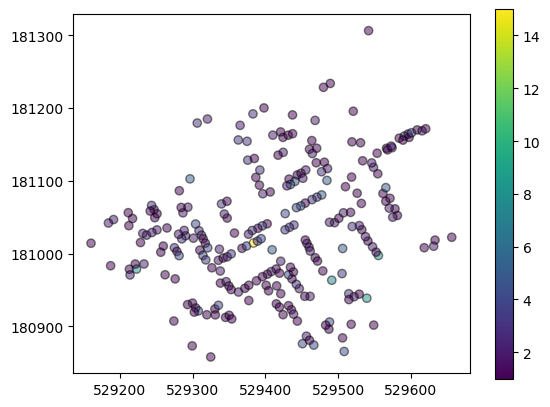

In [10]:
ax = deaths_df.plot(column='Count', alpha=0.5, edgecolor='k', legend=True)

Vamos a hacerlo de mayor tamaño y añadir las bombas:

<Axes: >

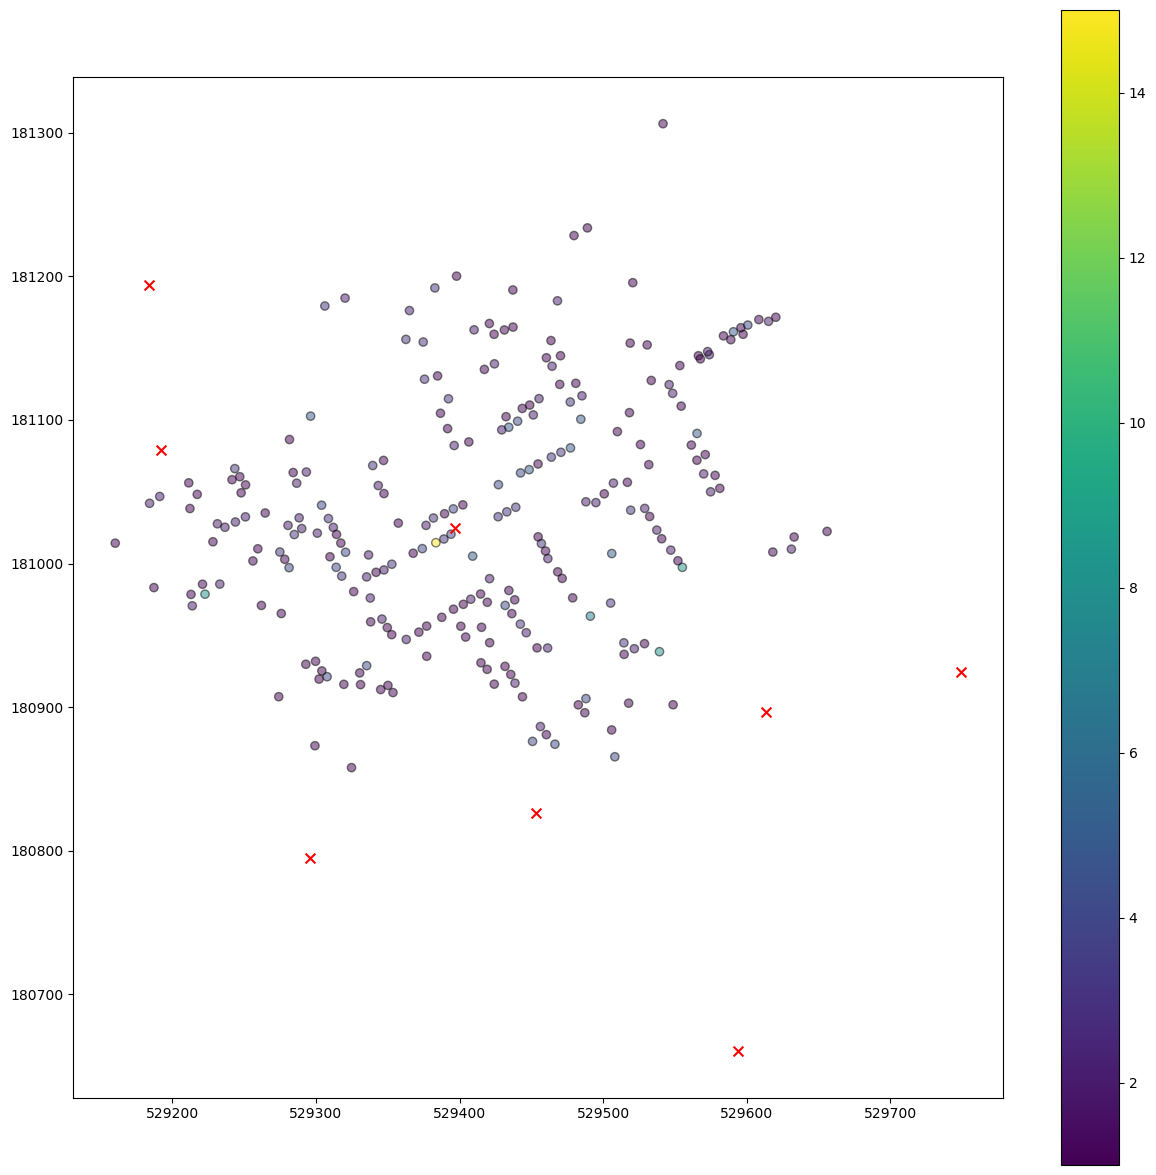

In [8]:
ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50)

CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\13\share\contrib\postgis-3.5\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 4 is expected. It comes from another PROJ installation.

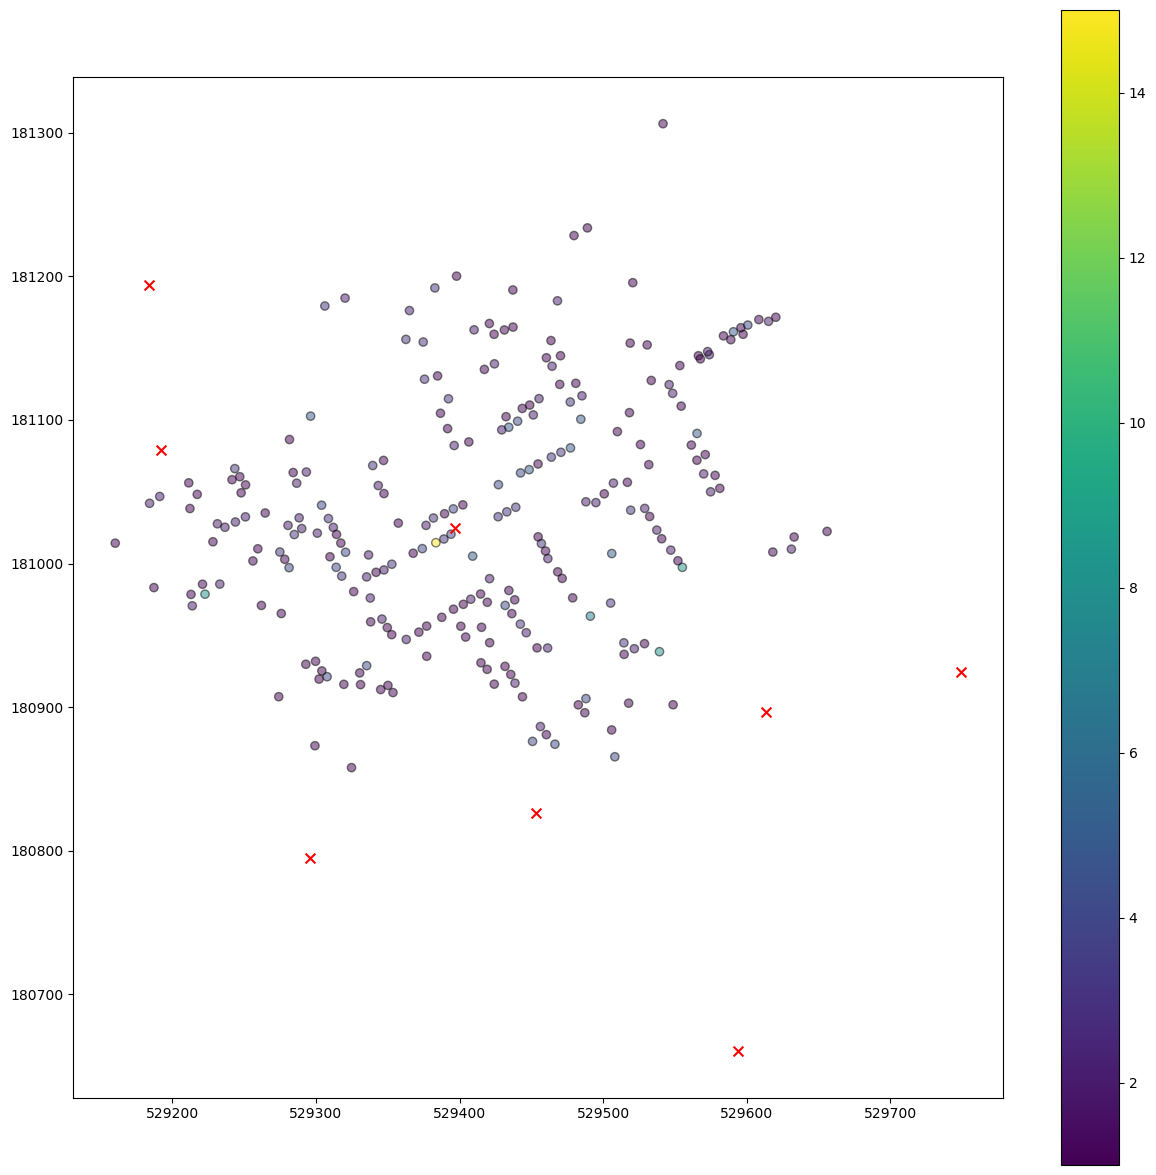

In [9]:
ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50);

ctx.add_basemap(ax,
    crs=deaths_df.crs.to_string(),
                
    # Snow's original map (hand-drawn)
    source="data/SnowGIS/SnowMap.tif"
)

En el resto del curso "cogeremos gustillo" a visualizar datos geoespaciales, pero también a analizarlos estadísticamente. Herramienta fundamental para ello es *Shapely*, para manejar y manipular formas geométricas.

# Shapely y objetos geométricos

Vamos a aprender cómo crear y manipular geometrías en Python usando el [paquete Shapely en Python](https://shapely.readthedocs.io/en/stable/manual.html).

**Sources:**

Los siguientes materiales se basan en [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html) y [Westra
E. (2013), Capítulo 3](https://www.packtpub.com/application-development/python-geospatial-development-first-edition).


## Principales objetos geométricos

![Spatial geometric objects](figs/geo-points-verts-polys.width-1200.jpg)

## Modelo de datos espaciales de Shapely

![Spatial data model](figs/spatialDataModel.png)

*Objetos geométricos fundamentales que se pueden usar en Python con* [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

Los objetos geométricos esenciales son `Points`, `Lines` y `Polygons`; elementos básicos cuando se trabaja con datos espaciales en formato vectorial.
Python tiene un módulo específico llamado [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) que permite llevar a cabo diversas operaciones geométricas. El conocimiento básico del uso de Shapely es fundamental para entender cómo se almacenan y manejan las geometrías en GeoPandas, paquete en el que se profundizará en próximas sesiones.

**Los objetos geométricos constan de tuplas de coordenadas:**

- Objeto `Point`: representa un único punto en el espacio. Los puntos pueden ser bidimensionales (x, y) o tridimensionales (x, y, z).
- Objeto `LineString`: (es decir, una línea) representa una secuencia de puntos unidos para constituir una línea. Por lo tanto, una línea consta de una lista de, al menos, dos tuplas de coordenadas.
- Objeto `Polygon`: representa un área rellena que consta de una lista de, al menos,  tres tuplas de coordenadas que forman el anillo exterior y una (posible) lista de polígonos de agujeros.


Además, **es posible tener una colección de objetos geométricos (por ejemplo, polígonos con varias partes):**

- Objeto `MultiPoint`: representa una colección de puntos y consta de una lista de tuplas de coordenadas.
- Objeto `MultiLineString`: representa una colección de líneas y consta de una lista de secuencias similares a líneas.
- Objeto `MultiPolygon`: representa una colección de polígonos que consta de una lista de secuencias similares a polígonos que se construyen a partir de tuplas de listas de anillos exteriores y (posibles) agujeros.

**Algunos atributos y métodos útiles en Shapely:**

- Creación de líneas y polígonos basados en una colección de objetos de tipo punto.
- Cálculo de áreas/longitud/límites, etc., de geometrías de entrada.
- Realizar operaciones geométricas basadas en geometrías de entrada. Por ejemplo: `union`, `difference`, `distance`, etc.
- Realizar consultas espaciales entre geometrías como `intersects`, `touches`, `crosses`, `within`, etc. (¡lo vimos en el tema de ogr, si recuerdas!).


### Point

Crear un punto es sencillo: se deben pasar las coordenadas x e y al objeto `Point()` (y opcional, la coordenada z):

In [10]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

¿Qué contienen las variables?:

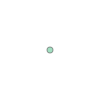

In [11]:
point1

Como vemos aquí, Jupyter notebook nos permite mostrar la forma directamente en la pantalla, pero no se preocupe porque se puede obtener también la información sobre la definición real de dichos objetos (usando `print`):


In [12]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


Como puede ver, el punto 3D se identifica por la letra Z mayúscula delante de las coordenadas.


Y también, claro, podemos chequear el tipo de datos de un punto:

In [13]:
type(point1)

shapely.geometry.point.Point

Podemos ver que el tipo del punto es `Point` de Shapely. El objeto punto se representa en un formato específico basado en
[GEOS](https://trac.osgeo.org/geos), biblioteca C++ y una de las bibliotecas estándar detrás de varios Sistemas de Información Geográfica. Se ejecuta por debajo del *hood*, por ejemplo, en [QGIS](http://www.qgis.org/en/site/).

#### Atributos y funciones de puntos

Los `Points` y otros objetos shapely, como siempre, tienen [atributos y métodos útiles incorporados](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Utilizando los atributos disponibles, podemos, por ejemplo, extraer los valores de las coordenadas de un punto y calcular la distancia euclidiana entre puntos, muy utilizada.

In [14]:
dir(point1)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_interpolate

El atributo `geom_type` contiene información sobre el tipo de geometría del objeto Shapely:

In [15]:
point1.geom_type

'Point'

La extracción de las coordenadas de un punto se puede realizar de las siguientes formas:

1. El atributo `coords` contiene la información de coordenadas como `CoordinateSequence`; otro tipo de datos relacionado con Shapely.

In [16]:
# Get x, y coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

En el ejemplo anterior, tenemos una tupla de coordenadas dentro de una lista. 

2. Usando los atributos `x` e `y`, se pueden obtener las coordenadas directamente como números decimales simples:

In [17]:
# Read x and y coordinates independently
x = point1.x
y = point1.y

In [18]:
print(x, y)

2.2 4.2


También es posible calcular la distancia entre dos objetos usando el método [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance). En nuestro ejemplo, la distancia se calcula en un sistema de coordenadas cartesianas. Cuando se trabaja con datos GIS reales, la distancia se basa en el sistema de referencia de coordenadas que se esté manejando (verifique cuál es la unidad de medida, por ejemplo, metros, en el sistema de referencia de coordenadas utilizado).

Vamos a calcular la distancia entre `point1` y `point2`:

In [19]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [20]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted message
print(f"Distance between the points is {dist} units")

Distance between the points is 29.723559679150142 units


### LineString

Crear objetos `LineString` es bastante similar a crear Shapely `Point`.

En lugar de usar una única tupla de coordenadas, para construir la línea usamos una lista de objetos Point de shapely o bien, pasar los puntos como tuplas de coordenadas:

In [21]:
# Create a LineString from the Point objects
line1 = LineString([point1, point2, point3])

In [22]:
# It is also possible using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [23]:
# Check if line1 and line2 are identical
line1 == line2 

True

Y así se representa nuestra línea:

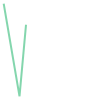

In [24]:
line1

In [25]:
print(line1)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


Como podemos observar, la variable `line1` se compone de múltiples pares de coordenadas.

Podemos también chequear el tipo de datos:

In [26]:
# Check data type of the line object
type(line1)

shapely.geometry.linestring.LineString

In [27]:
# Check geometry type of the line object
line1.geom_type

'LineString'

#### Atributos y funciones de LineString


El objeto `LineString` tiene muchos atributos y funcionalidades incorporadas útiles. Por ejemplo, es posible extraer las coordenadas o la longitud de una `LineString` (línea), calcular el centroide de la línea, crear puntos a lo largo de la línea a una distancia específica, calcular la distancia más cercana desde una línea a un punto específico y simplificar la geometría. Puede ver la lista completa de funcionalidades en la [documentación de Shapely](http://toblerity.org/shapely/manual.html). Ahora revisaremos sólo algunos de ellos:

In [28]:
# Get x, y coordinate tuples
list(line1.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Como puede observar, se trata de una lista de tuplas de coordenadas (x,y) dentro de una lista.

Si se necesita acceder a todas las coordenadas x, por ejemplo, o a todas las coordenadas y de la línea, se puede hacer directamente usando el atributo `xy`:

In [29]:
# Extract x and y coordinates separately
xcoords = list(line1.xy[0])
ycoords = list(line1.xy[1])

In [30]:
print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


También se pueden obtener atributos específicos tales como la longitud de la línea y el centro de la línea (centroide) directamente desde el propio objeto `LineString`:

In [31]:
# Get the lenght of the line
line_length = line1.length
print(f"Length of our line: {line_length} units")

Length of our line: 52.46106912939557 units


In [32]:
# Get the centroid of the line
print(line1.centroid)

POINT (6.229961354035622 -11.892411157572392)


Vea que el centroide de la línea es nuevamente un objeto Shapely `Point`.

### Polygon


Con la misma lógica para la creación de `Point` y `LineString`, se puede crear un objeto `Polygon`, pero el objeto Polygon solo acepta una secuencia de coordenadas como entrada.

El polígono necesita **al menos tres tuplas de coordenadas** (como mínimo, tres puntos para formar una superficie):

In [33]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

Si necesitamos obtener información de los pares de coordenadas (x,y) de los objetos point creados como una secuencia, se puede hacer con una lista de comprensión:

In [34]:
# Create a Polygon from the Shapely points information
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

Para comprender lo que se ha realizado, puede verificar de la siguiente forma qué genera la lista de comprensión:

In [35]:
[[p.x, p.y] for p in [point1, point2, point3]]

[[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]

Por tanto, se está pasando una lista de listas como entrada para crear el polígono.

In [36]:
# Easier adding a list of point objects
poly3 = Polygon([point1, point2, point3])

In [37]:
# Are the polygonal objects created using the different approaches identical?
print(poly == poly2)
print(poly == poly3)

True
True


El póligono tiene la siguiente "pinta":

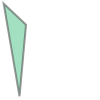

In [38]:
poly

In [39]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Observe que la representación `Polygon` tiene doble paréntesis alrededor de las coordenadas (es decir, `POLYGON ((<valores>))` ). Esto se debe a que Polygon también puede tener agujeros en su interior.

Verificamos el tipo de datos:

In [40]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [41]:
# Geometry type
poly.geom_type

'Polygon'

In [42]:
# Check the help for Polygon objects:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A s

En la ayuda [Polygon](https://shapely.readthedocs.io/en/stable/manual.html#polygons) se puede ver que es posible construir un polígono usando coordenadas exteriores y coordenadas interiores (opcional), donde las coordenadas interiores crean un agujero dentro del polígono:


Para entender lo anterior, creemos un `Polygon` con un agujero:

In [43]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [44]:
# Outer polygon
poly_out = Polygon(shell=border)
print(poly_out)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


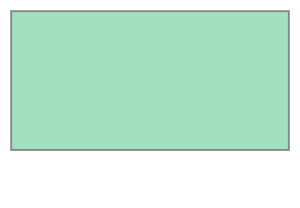

In [45]:
poly_out

In [46]:
# Let's create a single big hole where we leave ten units at the boundaries
# there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [47]:
# Now we can construct our Polygon with the hole inside
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


Vamos a ver cómo es frame:

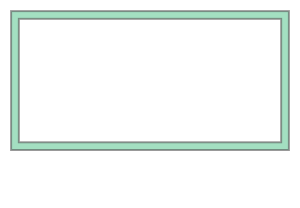

In [48]:
frame

De acuerdo a lo obtenido, `Polygon` tiene ahora dos tuplas de coordenadas diferentes. El primero representa el **exterior** y el segundo representa el **agujero** dentro del Polígono.

#### Atributos y funciones de Polygon

Nuevamente podemos acceder a diferentes atributos directamente desde el objeto `Polygon` de gran utilidad para los análisis que tengamos que realizar, tales como `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. Consulte la  lista completa de métodos en el [Manual de usuario de Shapely](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

Ahora repasaremos algunos de los atributos disponibles y cómo acceder a ellos:

In [49]:
# Print the outputs
print(f"Polygon centroid: {poly_out.centroid}")
print(f"Polygon Area: {poly_out.area}")
print(f"Polygon Bounding Box: {poly_out.bounds}")
print(f"Polygon Exterior: {poly_out.exterior}")
print(f"Polygon Exterior Length: {poly_out.exterior.length}")

Polygon centroid: POINT (0 0)
Polygon Area: 64800.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


Por tanto, es bastante sencillo acceder a diferentes atributos del objeto `Polygon`. En cuanto a las métricas de distancia tendrán más sentido cuando empecemos a trabajar con datos en un sistema de coordenadas proyectado.

#### Verifica que lo has comprendido:

¡Representa estas formas usando Shapely!

- **Pentagon**, example coords: `(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)` 
- **Triangle**   
- **Square**    
- **Circle**    


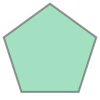

In [50]:
# Pentagon - Coordinates borrowed from this thread: https://tex.stackexchange.com/questions/179843/make-a-polygon-with-automatically-labelled-nodes-according-to-their-coordinates
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

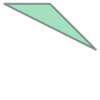

In [54]:
# Triangle
Polygon([(0,1), (1,1), (2,0)])


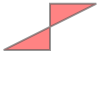

In [53]:
# Square
Polygon([(0,1), (1,1),(1,2),(2,2)])


In [ ]:
# Circle (using a buffer around a point)


## Colecciones de geometrías


A veces puede ser incluso útil almacenar múltiples geometrías (por ejemplo, varios puntos o varios polígonos) en una sola entidad. Un ejemplo práctico sería un país compuesto por varias islas. En tal caso, todos estos polígonos comparten los mismos atributos a nivel de país y podría ser razonable almacenar ese país como una colección de geometría que contenga todos los polígonos. La tabla de atributos contendría entonces una fila de información con atributos a nivel de país, y la geometría relacionada con esos atributos representaría varios polígonos.

En Shapely, las colecciones de puntos se implementan mediante el uso de un objeto `MultiPoint`, las colecciones de curvas mediante el uso de un objeto `MultiLineString` y las colecciones de superficies mediante un objeto `MultiPolygon`.

In [ ]:
# Import constructors to create geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

Primero creamos objetos MultiPoint y MultilineString:

In [ ]:
# Create a MultiPoint object of points: 1, 2 and 3
multi_point1 = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line1 = MultiLineString([line1, line2])

# Print object definitions
print(multi_point1)
print(multi_line1)

In [ ]:
multi_point1

In [ ]:
multi_line1

Los multipolígonos se construyen de manera similar. Creemos un cuadro delimitador combinando dos polígonos separados que, por ejemplo, podrían representar los hemisferios occidental y oriental:

In [ ]:
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Print object definition
print(west_poly)

In [ ]:
west_poly

Shapely también tiene una herramienta para crear [un cuadro delimitador](https://en.wikipedia.org/wiki/Minimum_bounding_box) basado en las coordenadas x e y mínimas y máximas. En lugar de usar el constructor Polygon, usemos el constructor [box](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box) para crear el otro polígono:

In [ ]:
from shapely.geometry import box

In [ ]:
# Specify the bbox extent (lower-left corner coordinates and upper-right corner coordinates)
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using Shapely
east_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Print object definition
print(east_poly)

In [ ]:
east_poly

Y por último, podemos combinar los dos polígonos en un MultiPolygon:

In [ ]:
# We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly])

# Print object definition
print(multi_poly)

In [ ]:
multi_poly

Por tanto, las salidas son similares a los objetos geométricos básicos creados anteriormente. Sin embargo, ahora estos objetos contienen múltiples características de los puntos, líneas o polígonos de que consta.

#### *Convex hull* y *envelope*

*Convex hull* se refiere al polígono más pequeño posible que contiene todos los objetos de una colección. Junto con el cuadro delimitador mínimo, el *convex hull* es una forma útil (*shape*) cuando se pretende describir la extensión de los datos.

Por ejemplo, vamos a crear un *convex hull* alrededor de nuestro objeto multi_punto:

In [ ]:
# Check input geometry
multi_point1

In [ ]:
# Convex Hull (smallest polygon around the geometry collection)
multi_point1.convex_hull

In [ ]:
# Envelope (smalles rectangular polygon around the geometry collection): 
multi_point1.envelope

#### Otros atributos útiles

Por ejemplo, longitud de la colección de geometría:

In [ ]:
print(f"Number of objects in our MultiLine: {len(multi_line1.geoms)}")

print(f"Number of objects in our MultiPolygon: {len(multi_poly.geoms)}")

Area:

In [ ]:
# Print outputs:
print(f"Area of our MultiPolygon: {multi_poly.area}")
print(f"Area of our Western Hemisphere polygon: {multi_poly.geoms[1].area}")

In [ ]:
print(multi_poly[0])

Se puede ver que los multipolígonos tienen exactamente los mismos atributos disponibles que los objetos geométricos individuales, pero ahora la información como el área calcula el área de **TODOS** los objetos individuales combinados. También podemos acceder a objetos individuales dentro de las colecciones de geometría usando índices (pruebe a realizar `multi_poly[0]`, ¿qué sucede?, ¿por qué?).

También podemos comprobar si tenemos un MultiPolygon "válido". Un *MultiPolygon es válido si los polígonos individuales no se cruzan entre sí*.
En el ejemplo, debido a que los polígonos tienen un meridiano 0 común, NO deberíamos tener un polígono válido. Compruebe la validez de un objeto como éste a partir del atributo **is_valid** que indica si los polígonos o líneas se cruzan entre sí. Esta información podría ser útil al intentar encontrar errores topológicos en sus datos:

In [ ]:
print(f"Is polygon valid?: {multi_poly.is_valid}")

<small><small><i>
Este notebook está adaptado de:
* Analyze Geospatial Data in Python: GeoPandas and Shapely: https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/
* Automating GIS-Processes: https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html
</i></small></small>

> *© 2025, Julia Clemente Párraga (<mailto:juliaclementep@gmail.com>). Licensed under [MIT License](https://opensource.org/license/mit/)*